<a href="https://colab.research.google.com/github/piyushbnsal10/Udacity-Pytorch-Scholarship/blob/master/FeedforwardNetwork_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch.nn.functional as F
n_workers=0
batch_size=20

transform=transforms.ToTensor()

train_data=datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data=datasets.MNIST(root='data',train=False,download=True,transform=transform)

train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=n_workers)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=n_workers)


dataiter=iter(train_loader)
images,labels=dataiter.next()
images=images.numpy()

#Display the image
"""fig=plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  ax.set_title(str(labels[idx].item()))"""


class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.fc1=nn.Linear(784,512)
    self.fc2=nn.Linear(512,512)
    self.fc3=nn.Linear(512,10)
    self.dropout=nn.Dropout(0.2)
    
  def forward(self,x):
    x=x.view(-1,784)
    x=F.relu(self.fc1(x))
    x=self.dropout(x)
    x=F.relu(self.fc2(x))
    x=self.dropout(x)
    x=self.fc3(x)
    
    return x
  
model=net()
print(model)


criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

n_epochs=50

model.train()

for epoch in range(n_epochs):
  train_loss=0.0
  
  
  for images,labels in train_loader:
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()*images.size(0)

  train_loss=train_loss/len(train_loader.dataset)

  if(epoch%10==0):
    print("Epoch:{}   Training Loss:{}".format(epoch+1,train_loss))



  
  


net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
Epoch:1   Training Loss:0.8308780188846091
Epoch:11   Training Loss:0.08719372481786801
Epoch:21   Training Loss:0.04420644118521402
Epoch:31   Training Loss:0.025478281905253728
Epoch:41   Training Loss:0.016989745845964837


In [11]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.055045

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 98% (1019/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 98% (965/982)
Test Accuracy of     5: 98% (879/892)
Test Accuracy of     6: 97% (938/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 96% (944/974)
Test Accuracy of     9: 98% (990/1009)

Test Accuracy (Overall): 98% (9833/10000)


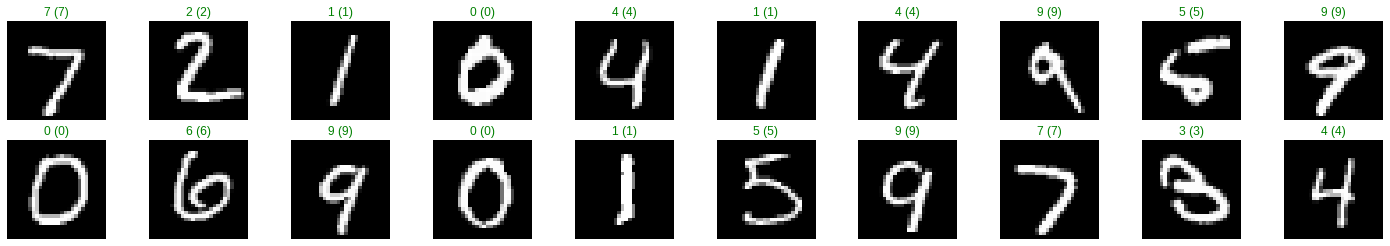

In [12]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))